<a href="https://colab.research.google.com/github/Yuxi-Cn/GB-Electricity_and_Emission_Prediction/blob/main/Electricity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Data Import and Preparation**

#### **1.1 Import Library and Read the File**

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from google.colab import drive

In [ ]:
# Access the csv file in my google drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/ColabNotebooks/AcademicProjectsDU/Research_Electricity-GB'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ColabNotebooks/AcademicProjectsDU/Research_Electricity-GB


In [ ]:
# Read csv file
csv_fuel = 'df_fuel_gb.csv'
df1 = pd.read_csv(csv_fuel)

# Filter rows based on the specified condition (the data is only prior to 2024-01-01)
filtered_df = df1[df1['DATETIME'] < '2024-01-01 00:00:00+00']

# Save the filtered data to a new CSV file
filtered_df.to_csv('09-24_fuel_gb.csv', index=False)

df = pd.read_csv('09-24_fuel_gb.csv')
pd.set_option('display.max_columns', None)
df.head(5)

,DATETIME,GAS,COAL,NUCLEAR,WIND,HYDRO,IMPORTS,BIOMASS,OTHER,SOLAR,STORAGE,GENERATION,CARBON_INTENSITY,LOW_CARBON,ZERO_CARBON,RENEWABLE,FOSSIL,GAS_perc,COAL_perc,NUCLEAR_perc,WIND_perc,HYDRO_perc,IMPORTS_perc,BIOMASS_perc,OTHER_perc,SOLAR_perc,STORAGE_perc,GENERATION_perc,LOW_CARBON_perc,ZERO_CARBON_perc,RENEWABLE_perc,FOSSIL_perc
0,2009-01-01 00:00:00+00,8351,15035,7098,276,246,2517,0,0,0,0,33523,525,7620,7620,522,23386,24.9,44.8,21.2,0.8,0.7,7.5,0.0,0.0,0.0,0.0,100,22.7,22.7,1.6,69.8
1,2009-01-01 00:30:00+00,8473,15093,7087,255,245,2498,0,0,0,0,33651,526,7587,7587,500,23566,25.2,44.9,21.1,0.8,0.7,7.4,0.0,0.0,0.0,0.0,100,22.5,22.5,1.5,70.0
2,2009-01-01 01:00:00+00,8435,15082,7073,229,246,2464,0,0,0,0,33529,527,7549,7549,475,23517,25.2,45.0,21.1,0.7,0.7,7.3,0.0,0.0,0.0,0.0,100,22.5,22.5,1.4,70.1
3,2009-01-01 01:30:00+00,8289,15020,7064,213,246,2430,0,0,0,0,33261,528,7522,7522,459,23309,24.9,45.2,21.2,0.6,0.7,7.3,0.0,0.0,0.0,0.0,100,22.6,22.6,1.4,70.1
4,2009-01-01 02:00:00+00,8258,14984,7051,196,246,2361,0,0,0,0,33096,529,7493,7493,442,23242,25.0,45.3,21.3,0.6,0.7,7.1,0.0,0.0,0.0,0.0,100,22.6,22.6,1.3,70.2


#### **1.2 Basic Data Quality Check**

In [ ]:
# Check missing data
missing_data = df.isnull().sum()
print(missing_data)

DATETIME            0
GAS                 0
COAL                0
NUCLEAR             0
WIND                0
HYDRO               0
IMPORTS             0
BIOMASS             0
OTHER               0
SOLAR               0
STORAGE             0
GENERATION          0
CARBON_INTENSITY    0
LOW_CARBON          0
ZERO_CARBON         0
RENEWABLE           0
FOSSIL              0
GAS_perc            0
COAL_perc           0
NUCLEAR_perc        0
WIND_perc           0
HYDRO_perc          0
IMPORTS_perc        0
BIOMASS_perc        0
OTHER_perc          0
SOLAR_perc          0
STORAGE_perc        0
GENERATION_perc     0
LOW_CARBON_perc     0
ZERO_CARBON_perc    0
RENEWABLE_perc      0
FOSSIL_perc         0
dtype: int64


In [ ]:
# Show dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262944 entries, 0 to 262943
Data columns (total 32 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATETIME          262944 non-null  object 
 1   GAS               262944 non-null  int64  
 2   COAL              262944 non-null  int64  
 3   NUCLEAR           262944 non-null  int64  
 4   WIND              262944 non-null  int64  
 5   HYDRO             262944 non-null  int64  
 6   IMPORTS           262944 non-null  int64  
 7   BIOMASS           262944 non-null  int64  
 8   OTHER             262944 non-null  int64  
 9   SOLAR             262944 non-null  int64  
 10  STORAGE           262944 non-null  int64  
 11  GENERATION        262944 non-null  int64  
 12  CARBON_INTENSITY  262944 non-null  int64  
 13  LOW_CARBON        262944 non-null  int64  
 14  ZERO_CARBON       262944 non-null  int64  
 15  RENEWABLE         262944 non-null  int64  
 16  FOSSIL            26

In [ ]:
# Show the shape of dataset
# 262944 data includes all data-records per half hour from 2009-01-01 00:00:00 to 2023-12-31 23:30:00
print(df.shape)

(262944, 32)


#### **1.3 Data Processing**

1. **Set index**: Set the 'DATETIME' column as the index.

2. **Calculate sum**: Calculate weekly, monthly, seasonal, annual sum for each energy source and carbon intensity.

3. **Decimal precision**: Set decimal places to 2 for clear and concise data values.

4. **Unit conversion**: Convert summed source generation from kWh to GW and summed carbon intensity from gCO2/kWh to kgCO2/kWh for enhancing readability.

5. **Correctly recalculate individual source percentages**: When summing data, compute source percentages by dividing each source's generation by the total generation, instead of summing up all percentages when operating '.sum()' function. This is to accurately represent their contributions.

In [ ]:
# Convert the 'DATETIME' column to datetime
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

# Set the 'DATETIME' column as the index
df.set_index('DATETIME', inplace=True)

# Resample the data to weekly, monthly, seasonal, annual intervals and sum the values
df_week = df.resample('W').sum()
df_month = df.resample('M').sum()
df_season = df.resample('Q').sum()
df_annual = df.resample('Y').sum()

In [ ]:
print(df_annual.info())
print(df_annual.shape)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2009-12-31 00:00:00+00:00 to 2023-12-31 00:00:00+00:00
Freq: A-DEC
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAS               15 non-null     int64  
 1   COAL              15 non-null     int64  
 2   NUCLEAR           15 non-null     int64  
 3   WIND              15 non-null     int64  
 4   HYDRO             15 non-null     int64  
 5   IMPORTS           15 non-null     int64  
 6   BIOMASS           15 non-null     int64  
 7   OTHER             15 non-null     int64  
 8   SOLAR             15 non-null     int64  
 9   STORAGE           15 non-null     int64  
 10  GENERATION        15 non-null     int64  
 11  CARBON_INTENSITY  15 non-null     int64  
 12  LOW_CARBON        15 non-null     int64  
 13  ZERO_CARBON       15 non-null     int64  
 14  RENEWABLE         15 non-null     int64  
 15  FOSSIL            15 non-null  

In [ ]:
df_annual.head()

,GAS,COAL,NUCLEAR,WIND,HYDRO,IMPORTS,BIOMASS,OTHER,SOLAR,STORAGE,GENERATION,CARBON_INTENSITY,LOW_CARBON,ZERO_CARBON,RENEWABLE,FOSSIL,GAS_perc,COAL_perc,NUCLEAR_perc,WIND_perc,HYDRO_perc,IMPORTS_perc,BIOMASS_perc,OTHER_perc,SOLAR_perc,STORAGE_perc,GENERATION_perc,LOW_CARBON_perc,ZERO_CARBON_perc,RENEWABLE_perc,FOSSIL_perc
DATETIME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-12-31 00:00:00+00:00,294815430,197615865,130004157,8314685,7116428,13379302,0,0,0,7233584,658479314,7793806,145435224,145435224,15431113,492431293,800161.9,492992.0,361228.4,22745.8,18425.9,39220.9,0.0,0.0,0.0,17217.7,1752000,402389.4,402389.4,41171.6,1293167.5
2010-12-31 00:00:00+00:00,314190823,205681727,117022079,9209657,4276624,13756849,0,0,0,6248258,670386109,8085177,130508458,130508458,13486336,519872551,836316.0,508830.5,314785.1,24789.1,10967.4,41641.1,0.0,0.0,0.0,14672.1,1752000,350533.7,350533.7,35757.6,1345141.1
2011-12-31 00:00:00+00:00,254089459,206791424,129542216,23825551,7390411,17211729,0,0,0,5839310,644690095,7878336,160758194,160758194,31215971,460880880,696583.0,537991.3,365783.7,66534.9,19931.8,50982.2,0.0,0.0,0.0,14185.4,1752000,452254.9,452254.9,86468.3,1234573.8
2012-12-31 00:00:00+00:00,166160493,274343158,132031577,31082401,6549376,27471472,0,4183339,0,5819370,647641180,8864345,169663364,169663364,37631788,440503651,438601.9,737920.7,372465.0,85869.5,17132.9,79323.9,0.0,11241.8,0.0,14215.2,1756800,475465.4,475465.4,103004.0,1176516.5
2013-12-31 00:00:00+00:00,160275817,251537099,131896468,42727580,5828794,35158296,0,7704971,4170499,5603992,644903528,8320639,184623361,184623361,52726871,411812922,414018.4,684895.9,372365.5,118745.6,15330.0,101081.8,0.0,20929.8,10834.1,13770.7,1752000,517284.5,517284.5,144915.4,1098908.8


**Convert Data Units and Decimal Places & Differentiate Zero_carbon and Low_carbon**

In [ ]:
# Define DataFrames
dfs = [df_week, df_month, df_season, df_annual]

# Units conversion and precision adjustment
columns_to_convert = ['GAS', 'COAL', 'NUCLEAR', 'WIND', 'HYDRO', 'IMPORTS', 'BIOMASS', 'OTHER', 'SOLAR',
                      'STORAGE', 'GENERATION', 'LOW_CARBON', 'ZERO_CARBON', 'RENEWABLE', 'FOSSIL']

# Replace the 'LOW_CARBON' data with only the 'BIOMASS' data
# To ensure there is no overlap between each type of generation (such as "ZERO_CARBON" and LOW_CARBON")
for df in dfs:
    df['LOW_CARBON'] = df['BIOMASS']

# Convert MWh to GWh
for df in dfs:
    df[columns_to_convert] = df[columns_to_convert] / 1000

# Convert g/kWh to kg/kWh for carbon intensity
for df in dfs:
    df['CARBON_INTENSITY'] = df['CARBON_INTENSITY'] / 1000

# Calculate percentages for source and generation categories
for df in dfs:
    source_columns = ['GAS', 'COAL', 'NUCLEAR', 'WIND', 'HYDRO', 'IMPORTS', 'BIOMASS', 'OTHER',
                      'SOLAR', 'STORAGE', 'GENERATION', 'LOW_CARBON', 'ZERO_CARBON', 'RENEWABLE', 'FOSSIL']
    for source in source_columns:
        perc_column = source + '_perc'
        df[perc_column] = (df[source] / df['GENERATION']) * 100

# Round all columns to 2 decimal places
for df in dfs:
    df[:] = df.round(2)

# Set "GENERATION_perc" to 100 for all corresponding timescale
for df in dfs:
    df['GENERATION_perc'] = 100

**The Unit of Data after the Conversion:**

*   Sources Generation Amount: **GWh**

*   Carbon Intensity: **kgCO2/kWh**

*   Source Percentage: **percent (%)**

**Convert the datetime index to the corresponding level (year, quarter, month)**

In [ ]:
# For df_annual (Year), df_season (Quarter), and df_month (Month)
df_annual.index = df_annual.index.to_period('Y').to_timestamp()
df_season.index = df_season.index.to_period('Q').to_timestamp()
df_month.index = df_month.index.to_period('M').to_timestamp()

<ipython-input-121-2687e87354e3>:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

<ipython-input-121-2687e87354e3>:5: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

<ipython-input-121-2687e87354e3>:8: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [ ]:
# Compare data between the first and last year (based on annual data)
first_year = df_annual.iloc[:1]
last_year = df_annual.iloc[-1:]

# Concatenate the selected rows into a single DataFrame
compare_rows = pd.concat([first_year, last_year])
pd.set_option('display.max_columns', None)

# Compare the two rows to observe differences in generation sources between 2009 and 2023
compare_rows

,GAS,COAL,NUCLEAR,WIND,HYDRO,IMPORTS,BIOMASS,OTHER,SOLAR,STORAGE,GENERATION,CARBON_INTENSITY,LOW_CARBON,ZERO_CARBON,RENEWABLE,FOSSIL,GAS_perc,COAL_perc,NUCLEAR_perc,WIND_perc,HYDRO_perc,IMPORTS_perc,BIOMASS_perc,OTHER_perc,SOLAR_perc,STORAGE_perc,GENERATION_perc,LOW_CARBON_perc,ZERO_CARBON_perc,RENEWABLE_perc,FOSSIL_perc
DATETIME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-01,294815.43,197615.86,130004.16,8314.68,7116.43,13379.30,0.00,0.00,0.00,7233.58,658479.31,7793.81,0.00,145435.22,15431.11,492431.29,44.77,30.01,19.74,1.26,1.08,2.03,0.00,0.00,0.00,1.1,100,0.00,22.09,2.34,74.78
2023-01-01,172935.42,5526.75,76595.86,157967.41,6496.11,66856.45,26717.48,5136.33,26639.13,3315.26,548186.25,2610.25,26717.48,267698.51,191102.65,178462.17,31.55,1.01,13.97,28.82,1.19,12.20,4.87,0.94,4.86,0.6,100,4.87,48.83,34.86,32.56


### **2. Data Visualisation**

#### **2.1 Energy Trends**


##### **2.1.1 Overall Trends**

**Area Chart - All Generation Types**

In [ ]:
import plotly.graph_objs as go
import pandas as pd

# Select only the generation-source columns
columns_to_plot = ['GAS', 'COAL', 'NUCLEAR', 'WIND', 'HYDRO', 'IMPORTS',
                   'BIOMASS', 'OTHER', 'SOLAR', 'STORAGE']
df_annual_stack = df_annual[columns_to_plot]

# Function to format numbers with 'k' for thousands and 'M' for millions
def format_hover(y):
    abs_value = abs(y)  # Get the absolute value to handle negative numbers
    if abs_value >= 1_000_000:
        formatted_value = f'{abs_value/1_000_000:.2f}M'
    elif abs_value >= 1_000:
        formatted_value = f'{abs_value/1_000:.2f}k'
    else:
        formatted_value = f'{abs_value:.2f}'

    # Add back the negative sign if the original number was negative
    return f'-{formatted_value}' if y < 0 else formatted_value

# Create a stacked area chart
fig = go.Figure()

for col in columns_to_plot:
    fig.add_trace(go.Scatter(
        x=df_annual_stack.index,
        y=df_annual_stack[col],
        mode='lines',
        stackgroup='one',
        name=col,
        hovertemplate='%{x|%Y-%m-%d}<br>%{customdata}',
        customdata=[format_hover(y) for y in df_annual_stack[col]]
    ))

# Add annotation with the years highlighted - which shows the time that wind generation overtakes coal's
fig.add_annotation(
    x='2017-01-01',
    y=0.5,
    text="Wind energy overtakes coal\n(2015-2020)",
    showarrow=True,
    arrowhead=2,
    ax=-50,
    ay=-50,
    bgcolor="rgba(255, 255, 255, 0.8)"
)

# Update layout for aesthetics and axis styling
fig.update_layout(
    title='Annual Energy Generation Trends by Source',
    xaxis_title='Year',
    yaxis_title='Energy Generation (GWh)',
    legend_title='Energy Sources',
    font=dict(size=14),
    legend=dict(x=1.1, y=1.02),
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(
        showline=True,
        linewidth=2,
        linecolor='black',
        mirror=False,
        title_font=dict(size=14, color='black'),
        tickfont=dict(size=12, color='black')
    ),
    yaxis=dict(
        showline=True,
        linewidth=2,
        linecolor='black',
        mirror=False,
        title_font=dict(size=14, color='black'),
        tickfont=dict(size=12, color='black')
    ),
    legend_itemclick="toggleothers",
)

fig.show()

*Note: Click the legend to highlight the area*

**Line Chart - Fossil vs. Renewable Generation**

In [ ]:
# Define fossil fuels and renewables
fossil_fuels = ['GAS', 'COAL', 'NUCLEAR', 'OTHER']
renewables = ['WIND', 'HYDRO', 'BIOMASS', 'SOLAR', 'STORAGE']

# Create a figure for fossil fuels
fig_fossil = go.Figure()

# Plot fossil fuels data
for col in fossil_fuels:
  fig_fossil.add_trace(go.Scatter(
    x=df_annual.index,
    y=df_annual[col],
    mode='lines+markers',
    name=col,
    hovertemplate='%{x|%Y-%m-%d}<br>%{customdata}',
    customdata=[format_hover(y) for y in df_annual[col]]
))

# Update layout
fig_fossil.update_layout(
    title='Fossil Fuels Generation Trends',
    xaxis_title='Year',
    yaxis_title='Generation (GWh)',
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(
        showline=True,
        linewidth=2,
        linecolor='black',
        gridcolor='lightgray',
        gridwidth=0.5
    ),
    yaxis=dict(
        showline=True,
        linewidth=2,
        linecolor='black',
        gridcolor='lightgray',
        gridwidth=0.5
    ),
    legend=dict(
        x=1.05,
        y=1,
        traceorder='normal',
        font=dict(size=12),
    ),
    legend_itemclick="toggleothers",
)

# Create a figure for renewables
fig_renewable = go.Figure()

# Plot renewables data
for col in renewables:
    fig_renewable.add_trace(go.Scatter(
        x=df_annual.index,
        y=df_annual[col],
        mode='lines+markers',
        name=col,
        hovertemplate='%{x|%Y-%m-%d}<br>%{customdata}',
        customdata=[format_hover(y) for y in df_annual[col]]
    ))

# Update layout
fig_renewable.update_layout(
    title='Renewables Generation Trends',
    xaxis_title='Year',
    yaxis_title='Generation (GWh)',
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(
        showline=True,
        linewidth=2,
        linecolor='black',
        gridcolor='lightgray',
        gridwidth=0.5
    ),
    yaxis=dict(
        showline=True,
        linewidth=2,
        linecolor='black',
        gridcolor='lightgray',
        gridwidth=0.5
    ),
    legend=dict(
        x=1.05,
        y=1,
        traceorder='normal',
        font=dict(size=12),
    ),
    legend_itemclick="toggleothers",
)

# Show both charts together
fig_fossil.show()
fig_renewable.show()

*Note: Click the legend to highlight the line*

**Line Chart - Generation catrgories vs. Carbon Intensity**

In [ ]:
# List of columns
# Note: only 'CARBON_INTENSITY' has different units
type_columns = ['CARBON_INTENSITY', 'LOW_CARBON', 'ZERO_CARBON', 'RENEWABLE', 'FOSSIL']

# Create the figure
fig = go.Figure()

# Plot data for columns with GWh unit on the left y-axis
for column in type_columns[1:]:
    color = 'gold' if column == 'FOSSIL' else 'violet' if column == 'ZERO_CARBON' else None
    fig.add_trace(go.Scatter(
        x=df_annual.index,
        y=df_annual[column],
        mode='lines+markers',
        name=column,
        yaxis='y1',
        line=dict(color=color),
        hovertemplate='%{x|%Y-%m-%d}<br>%{customdata}',
        customdata=[format_hover(y) for y in df_annual[column]]
    ))

# Plot 'CARBON_INTENSITY' data on the right y-axis with red color
fig.add_trace(go.Scatter(
    x=df_annual.index,
    y=df_annual['CARBON_INTENSITY'],
    mode='lines+markers',
    name='CARBON INTENSITY',
    yaxis='y2',
    line=dict(color='red', width=5, dash='dash'),
    hovertemplate='%{x|%Y-%m-%d}<br>%{customdata}',
    customdata=[format_hover(y) for y in df_annual['CARBON_INTENSITY']]
))

# Set layout to include two y-axes, grid, and axis borders
fig.update_layout(
    title='Generation Trends of Energy Types and Carbon Intensity',
    xaxis=dict(
        title='Year',
        showline=True,
        linewidth=2,
        linecolor='black',
        gridcolor='lightgray',
        gridwidth=0.5,
        titlefont=dict(size=16, color='black'),
        tickfont=dict(size=14, color='black'),
    ),
    yaxis=dict(
        title='Generation (GWh)',
        titlefont=dict(size=16, color='black'),
        tickfont=dict(size=14, color='black'),
        showline=True,
        linewidth=2,
        linecolor='black',
        gridcolor='lightgray',
        gridwidth=0.5,
        mirror=True
    ),
    yaxis2=dict(
        title='Carbon Intensity (kgCO2/kWh)',
        titlefont=dict(size=16, color='red'),
        tickfont=dict(size=14, color='red'),
        overlaying='y',
        side='right',
        showline=True,
        linewidth=2,
        linecolor='black'
    ),
    legend=dict(
        x=0.82,
        y=0.99,
        xanchor='left',
        yanchor='top',
        bordercolor="Black",
        borderwidth=1,
        orientation="v"
    ),
    plot_bgcolor='rgba(255, 255, 255, 1)',
    margin=dict(t=50, l=50, r=100, b=50),
    legend_itemclick="toggleothers"
)

# Enhance contrast and readability
fig.update_traces(marker=dict(size=6, line=dict(width=2)),
                  line=dict(width=2))

# Display
fig.show()

*Note: Click the legend to highlight the line*

**Combined Chart - Renewable Generation vs. Carbon Intensity**

In [ ]:
# List of columns
type_columns = ['CARBON_INTENSITY', 'RENEWABLE']

# Create the figure
fig = go.Figure()

# Plot the carbon intensity data as lines on the right y-axis
fig.add_trace(go.Scatter(
    x=df_annual.index,
    y=df_annual['CARBON_INTENSITY'],
    mode='lines+markers',
    name='CARBON INTENSITY',
    yaxis='y2',
    line=dict(color='red', dash='dash', width=4),
    marker=dict(size=6),
    customdata=[format_hover(y) for y in df_annual['CARBON_INTENSITY']],
    hovertemplate='%{x|%Y-%m-%d}<br>%{customdata}'
))

# Plot the renewable data as bars on the left y-axis
fig.add_trace(go.Bar(
    x=df_annual.index,
    y=df_annual['RENEWABLE'],
    name='RENEWABLE',
    yaxis='y1',
    marker_color='green',
    opacity=0.6,
    customdata=[format_hover(y) for y in df_annual['RENEWABLE']],
    hovertemplate='%{x|%Y-%m-%d}<br>%{customdata}'
))

# Update layout
fig.update_layout(
    title='Carbon Intensity and Renewable Generation Trends',
    xaxis=dict(
        title='Year',
        showline=True,
        linewidth=2,
        linecolor='black',
        mirror=False,
        gridcolor='lightgray',
        gridwidth=0.5,
        titlefont=dict(size=16, color='black'),
        tickfont=dict(size=14, color='black'),
    ),
    yaxis=dict(
        title='Renewable Generation (GWh)',
        titlefont=dict(size=16, color='green'),
        tickfont=dict(size=14, color='green'),
        showline=True,
        linewidth=2,
        linecolor='black',
        gridcolor='lightgray',
        gridwidth=0.5,
        mirror=True
    ),
    yaxis2=dict(
        title='Carbon Intensity (kgCO2/kWh)',
        titlefont=dict(size=16, color='red'),
        tickfont=dict(size=14, color='red'),
        overlaying='y',
        side='right',
        showline=True,
        linewidth=2,
        linecolor='black'
    ),
    legend=dict(
        x=0.45,
        y=0.99,
        xanchor='left',
        yanchor='top',
        bordercolor="Black",
        borderwidth=1,
        orientation="v"
    ),
    plot_bgcolor='rgba(255, 255, 255, 1)',
    margin=dict(t=50, l=50, r=100, b=50),
    legend_itemclick="toggleothers",
)

# Enhance contrast and readability
fig.update_traces(
    selector=dict(type='scatter'),
    line=dict(width=2)
)

# Display
fig.show()

##### **2.1.2 Quarterly Variations**

**Line Chart - Seasonal flucatuation**

In [ ]:
# Plot the generation data
fig = go.Figure()

# Add the main generation line plot
fig.add_trace(go.Scatter(
    x=df_season.index,
    y=df_season['GENERATION'],
    mode='lines+markers',
    marker=dict(size=8, symbol='circle', color='blue'),
    line=dict(color='blue', width=2),
    name='Generation',
    customdata=[format_hover(y) for y in df_season['GENERATION']],
    hovertemplate='Generation: %{customdata} GWh <br>Date: %{x|%Y-%m-%d} <extra></extra>'
))

# Annotate the first and last fourth quarter (2009-10-01 and 2023-10-01) - showing the difference of generation
first_fourth_quarter_index = df_season.index.get_loc(pd.Timestamp('2009-10-01'))
last_fourth_quarter_index = df_season.index.get_loc(pd.Timestamp('2023-10-01'))

fig.add_annotation(
    x=df_season.index[first_fourth_quarter_index],
    y=df_season['GENERATION'].iloc[first_fourth_quarter_index],
    text=f"{format_hover(df_season['GENERATION'].iloc[first_fourth_quarter_index])}",
    showarrow=True,
    arrowhead=1,
    ax=0,
    ay=-40,
    font=dict(color='black', size=12)
)

fig.add_annotation(
    x=df_season.index[last_fourth_quarter_index],
    y=df_season['GENERATION'].iloc[last_fourth_quarter_index],
    text=f"{format_hover(df_season['GENERATION'].iloc[last_fourth_quarter_index])}",
    showarrow=True,
    arrowhead=1,
    ax=0,
    ay=-40,
    font=dict(color='black', size=12)
)

# Highlight every second and third quarter (specifically, 03-31 to 09-30)
for year in range(2009, 2024):  # Adjusting for 2023 data
    highlight_color = 'lightblue' if year == 2023 else 'gray'
    opacity_value = 0.7 if year == 2023 else 0.4

    fig.add_vrect(
        x0=pd.Timestamp(f'{year}-03-31'),
        x1=pd.Timestamp(f'{year}-06-30'),
        fillcolor=highlight_color,
        opacity=opacity_value,
        layer='below',
        line_width=0,
    )
    fig.add_vrect(
        x0=pd.Timestamp(f'{year}-06-30'),
        x1=pd.Timestamp(f'{year}-09-30'),
        fillcolor=highlight_color,
        opacity=opacity_value,
        layer='below',
        line_width=0,
    )

# Update layout
fig.update_layout(
    title='Seasonal Trends in Total Electricity Generation',
    xaxis=dict(
        title='Year',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
        showline=True,
        linewidth=2,
        linecolor='black',
        dtick="M24",
        tickformat="%Y"
    ),
    yaxis=dict(
        title='Generation Amount (GWh)',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
        showline=True,
        linewidth=2,
        linecolor='black'
    ),
    hovermode="x unified",  # Show all hover info in a unified box
    plot_bgcolor='white',
    margin=dict(t=50, l=50, r=50, b=50),
    showlegend=False
)

# Update x-axis rotate labels
fig.update_xaxes(tickangle=45)

# Add a comment comparing the first and last fourth quarter generation difference
first_fourth_quarter = df_season['GENERATION'].loc[pd.Timestamp('2009-10-01')]
last_fourth_quarter = df_season['GENERATION'].loc[pd.Timestamp('2023-10-01')]
generation_diff = last_fourth_quarter - first_fourth_quarter

# Position the annotation
fig.add_annotation(
    x=pd.Timestamp('2023-10-01'),
    y=last_fourth_quarter + 5,
    text=f"Generation Difference (2009-2023 Q4): {format_hover(generation_diff)} GWh",
    showarrow=False,
    font=dict(color='red', size=12),
    bgcolor="white",
    opacity=0.8,
    xanchor='center',
    yanchor='top'
)

# Display
fig.show()

**Line Chart - Cyclicality of Wind and Solar**

In [ ]:
# Focus on Wind and Solar energy trends only
type1_columns = ['WIND', 'SOLAR']

# Create the figure
fig = go.Figure()

# Plot the data
for column in type1_columns:
    fig.add_trace(go.Scatter(
        x=df_season.index,
        y=df_season[column],
        mode='lines+markers',
        name=column,
        customdata=[format_hover(y) for y in df_season[column]],  # Custom formatted data for hover
        hovertemplate='Generation: %{customdata} GWh <br> Date: %{x|%Y-%m-%d}'  # Custom hover template
    ))

# Calculate the largest increase in a single quarter for Wind and Solar energy
max_increase = 0
max_increase_quarter = None
max_increase_column = None

for column in type1_columns:
    # Calculate the quarter-on-quarter difference
    diff = df_season[column].diff()
    # Find the largest increase
    max_diff = diff.max()
    if max_diff > max_increase:
        max_increase = max_diff
        max_increase_quarter = diff.idxmax()
        max_increase_column = column

# Highlight the largest increase
fig.add_annotation(
    x=max_increase_quarter,
    y=df_season.loc[max_increase_quarter, max_increase_column],
    text=f"Largest quarter increase <br> of {max_increase_column} generation: \n{format_hover(max_increase)} GWh",
    showarrow=True,
    arrowhead=2,
    ax=-50,
    ay=-50,
    bgcolor="rgba(255, 255, 255, 0.8)",
    font=dict(size=12)
)

# Highlight every second and third quarter (03-31 to 09-30)
for year in range(2009, 2024):
    fig.add_vrect(
        x0=pd.Timestamp(f'{year}-03-31'),
        x1=pd.Timestamp(f'{year}-06-30'),
        fillcolor='gray',
        opacity=0.4,
        layer='below',
        line_width=0
    )
    fig.add_vrect(
        x0=pd.Timestamp(f'{year}-06-30'),
        x1=pd.Timestamp(f'{year}-09-30'),
        fillcolor='gray',
        opacity=0.4,
        layer='below',
        line_width=0
    )

# Update layout
fig.update_layout(
    title='Strong Seasonal Trends in Wind and Solar Generation',
    xaxis_title='Year',
    yaxis_title='Generation Amount (GWh)',
    legend_title='Energy Sources',
    font=dict(size=14),
    xaxis=dict(
        showline=True,
        linewidth=2,
        linecolor='black',
        mirror=False,
        title_font=dict(size=14, color='black'),
        tickfont=dict(size=12, color='black')
    ),
    yaxis=dict(
        showline=True,
        linewidth=2,
        linecolor='black',
        mirror=False,
        title_font=dict(size=14, color='black'),
        tickfont=dict(size=12, color='black')
    ),
    legend=dict(
        x=1.02,
        y=1.02,
        traceorder='normal',
        font=dict(size=12),
    ),
    legend_itemclick="toggleothers"
)

fig.show()

*Note: The largest quarter increase is from the third quarter (July - September) of 2022 to the fourth quarter (October - December) of 2022*

#### **2.2 Evolution of Energy Proportions**

**Stacked Bar Chart - Fossil vs. Zero Carbon Generation**

In [ ]:
# Only load two columns to compare them
columns_to_plot = ['ZERO_CARBON_perc', 'FOSSIL_perc']
colors = ['#66c2a5', '#fc8d62']

# Create a figure
fig = go.Figure()

# Plot the stacked bar chart
for i, column in enumerate(columns_to_plot):
    fig.add_trace(go.Bar(
        x=df_annual.index,
        y=df_annual[column],
        name=column,
        marker_color=colors[i],
        text=[f"{int(y)}%" for y in df_annual[column]],
        textposition='inside',
        hovertemplate='%{x|%Y}: %{y}%',
        opacity=1
    ))
# Apply font styling to all traces
fig.update_traces(textfont=dict(color='white', size=14, family="Arial Black"))

# Update layout
fig.update_layout(
    title=dict(
        text='Evolution of Clean and Fossil Generation Proportions Over Time',
        font=dict(size=21, color='black')
    ),
    xaxis=dict(
        title='Year',
        titlefont=dict(size=18),
        tickfont=dict(size=15),
        showline=True,
        linewidth=2,
        linecolor='black'
    ),
    yaxis=dict(
        title='Total Generation Percentage (%)',
        titlefont=dict(size=18),
        tickfont=dict(size=15),
        showline=True,
        linewidth=2,
        linecolor='black'
    ),
    barmode='stack',
    legend=dict(
        title=dict(
            text='Energy Sources Percentage',
            font=dict(size=15)
        ),
        font=dict(size=12),
        bgcolor='white',
        bordercolor='black',
        borderwidth=1.5,
        x=1.02,
        y=0.95
    ),
    height=600,
    width=1200,
    plot_bgcolor='rgba(0,0,0,0.7)',
    margin=dict(t=50, l=50, r=50, b=50),
    legend_itemclick="toggleothers",
    hovermode='x unified'
)

# Add gridlines
fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='white', griddash='dash')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='white', griddash='dash')

# Adjust the text color
fig.update_traces(textfont=dict(color='white'))

# Display
fig.show()

**Sunburst Chart - Generation Proportion Change**

In [ ]:
import plotly.subplots as sp

# Extract data for 2009 and 2023
first_year = df_annual.iloc[0]
last_year = df_annual.iloc[-1]

# Define the energy categories
fossil_sources = ["GAS", "COAL", "OTHER"]  # Note: Nuclear is not fossil energy, so I remove it from this category
renewable_sources = ["WIND", "HYDRO", "BIOMASS", "SOLAR"]

# Prepare data for the first year - 2009
labels_first = ["2009", "Fossil", "Renewable", "NUCLEAR"] + fossil_sources + renewable_sources
parents_first = ["", "2009", "2009", "2009"] + ["Fossil"]*len(fossil_sources) + ["Renewable"]*len(renewable_sources)
values_first = [
    first_year[fossil_sources].sum() + first_year[renewable_sources].sum() + first_year["NUCLEAR"],
    first_year[fossil_sources].sum(),
    first_year[renewable_sources].sum(),
    first_year["NUCLEAR"]
] + list(first_year[fossil_sources]) + list(first_year[renewable_sources])

# Prepare data for the last year - 2023
labels_last = ["2023", "Fossil", "Renewable", "NUCLEAR"] + fossil_sources + renewable_sources
parents_last = ["", "2023", "2023", "2023"] + ["Fossil"]*len(fossil_sources) + ["Renewable"]*len(renewable_sources)
values_last = [
    last_year[fossil_sources].sum() + last_year[renewable_sources].sum() + last_year["NUCLEAR"],
    last_year[fossil_sources].sum(),
    last_year[renewable_sources].sum(),
    last_year["NUCLEAR"]
] + list(last_year[fossil_sources]) + list(last_year[renewable_sources])

# Create the subplot layout
fig = sp.make_subplots(rows=1, cols=2, specs=[[{'type': 'sunburst'}, {'type': 'sunburst'}]])

# The first year sunburst plot
fig.add_trace(go.Sunburst(
    labels=labels_first,
    parents=parents_first,
    values=values_first,
    branchvalues="total",
    hoverinfo="label+percent entry",
    textinfo='label+percent root',
    insidetextorientation='auto'
), row=1, col=1)

# The last year sunburst plot
fig.add_trace(go.Sunburst(
    labels=labels_last,
    parents=parents_last,
    values=values_last,
    branchvalues="total",
    hoverinfo="label+percent entry",
    textinfo='label+percent root',
    insidetextorientation='auto'
), row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Energy Distribution: 2009 vs 2023",
    title_x=0.5,
    title_y=0.95,
    paper_bgcolor='rgba(255, 255, 255, 1)',
    margin=dict(t=50, l=25, r=25, b=25),
    height=600,
    width=1200,
    sunburstcolorway=["#EF553B", "#4682B4","#32CD32", "#FF7F0E", "#FFA07A", "#2CA02C", "#98FB98", "#FF4500", "#FF6347"],  # Green-ish for Renewable, Light blue for Nuclear
    uniformtext=dict(minsize=12, mode='hide')
)

fig.show()

#### **2.3 Weight Analysis**


*   This weight analysis illustrates the impact of individual sources's change to
the change of carbon intensity.
*   In other words, the percentage data shows the different importance of sources in changing carbon intensity.

In [ ]:
# Step 1: Calculate the annual change in carbon intensity
df_annual['CHANGE_CARBON_INTENSITY'] = df_annual['CARBON_INTENSITY'].diff()

# Step 2: Calculate the total change in carbon intensity across the entire dataset
total_change_carbon_intensity = df_annual['CHANGE_CARBON_INTENSITY'].sum()

# Step 3: Calculate the weighted contribution of each energy source's change to the total change in carbon intensity
energy_sources = ['GAS', 'COAL', 'NUCLEAR', 'WIND', 'HYDRO', 'IMPORTS', 'BIOMASS', 'SOLAR', 'STORAGE', 'OTHER']
weights = {}

for source in energy_sources:
    # Multiplying the annual change in each source by the change in carbon intensity to get the contribution
    weighted_contribution = (
        (df_annual[source].diff() * df_annual['CHANGE_CARBON_INTENSITY']).sum()
        / total_change_carbon_intensity
    )

    # Store the weighted contribution in the weights dictionary
    weights[source] = weighted_contribution

# Step 4: Calculate the percentage contribution (weights) of each energy source to the total change in carbon intensity
# Normalise the contributions by dividing by the total weight
total_weight = sum(abs(weight) for weight in weights.values())
percentage_weights = {source: abs(weight) / total_weight * 100 for source, weight in weights.items()}

# Step 5: Output the percentage weights for each energy source
print("Weight of energy source change in relation to carbon intensity change:")
for source, weight in percentage_weights.items():
    print(f"{source}: {weight:.2f}%")

Weight of energy source change in relation to carbon intensity change:
GAS: 21.48%
COAL: 55.40%
NUCLEAR: 2.30%
WIND: 10.01%
HYDRO: 0.57%
IMPORTS: 2.57%
BIOMASS: 2.24%
SOLAR: 3.73%
STORAGE: 0.21%
OTHER: 1.49%


**Bar chart - Contribution Weights to Carbon Intensity Change**

In [ ]:
import plotly.express as px

# Sort the percentage weights in descending order
sorted_sources = sorted(percentage_weights.items(), key=lambda item: item[1], reverse=False)
sorted_sources_dict = {k: v for k, v in sorted_sources}

# Create a vertical chart
fig_bar = px.bar(
    x=list(sorted_sources_dict.values()),
    y=list(sorted_sources_dict.keys()),
    labels={'x': 'Percentage Contribution', 'y': 'Energy Source'},
    title='Percentage Contribution of Energy Sources <br>to Carbon Intensity Change',
    text=[f"{v:.2f}%" for v in sorted_sources_dict.values()],
    color=list(sorted_sources_dict.keys()),
    color_discrete_map={source: ('#88FF88' if source in renewable_sources else '#FF6666') for source in sorted_sources_dict.keys()},
    orientation='h'
)

# Update layout
fig_bar.update_traces(textposition='outside')
fig_bar.update_layout(
    xaxis_title='Percentage Contribution (%)',
    yaxis_title='Energy Source',
    height=700,
    width=700,
    xaxis=dict(
        tickformat='.2f',
        range=[0, max(sorted_sources_dict.values()) * 1.2]
    ),
    uniformtext_minsize=11,
    uniformtext_mode='hide',
    paper_bgcolor='white',
    showlegend=False
)

# Display
fig_bar.show()

#### **2.4 Correlation Validation**

*   **Pearson Correlation** is applied to assess the linear relationship between energy source generation and carbon intensity.


In [ ]:
# Extract data columns for energy sources and carbon intensity
sources = ['GAS', 'COAL', 'NUCLEAR', 'WIND', 'HYDRO', 'IMPORTS',
           'BIOMASS', 'OTHER', 'SOLAR', 'STORAGE']
df_sources = df_annual[sources]
carbon_intensity_data = df_annual['CARBON_INTENSITY']

# Calculate and display correlation coefficients with carbon intensity
correlation_coefficients = {
    source: np.corrcoef(df_sources[source], carbon_intensity_data)[0, 1]
    for source in sources
}

# Sort correlations in descending order
sorted_correlations = sorted(correlation_coefficients.items(), key=lambda x: x[1], reverse=True)

# Output the sorted correlation coefficients
print("Correlation Coefficients with Carbon Intensity for Energy Sources:")
for source, correlation in sorted_correlations:
    print(f"{source}: {correlation:.3f}")

Correlation Coefficients with Carbon Intensity for Energy Sources:
COAL: 0.991
STORAGE: 0.844
NUCLEAR: 0.722
GAS: 0.100
OTHER: -0.064
HYDRO: -0.265
IMPORTS: -0.721
BIOMASS: -0.852
WIND: -0.936
SOLAR: -0.976


In [ ]:
# Prepare the data
fig_bar = go.Figure()

fig_bar.add_trace(go.Bar(
    x=[correlation for _, correlation in sorted_correlations],
    y=[source for source, _ in sorted_correlations],
    orientation='h',
    marker_color='rgb(58, 71, 80)',
    text=[f"{correlation:.3f}" for _, correlation in sorted_correlations],
    textposition='outside',
))

# Update layout
fig_bar.update_layout(
    title='Correlation of Energy Sources with Carbon Intensity',
    xaxis_title='Correlation Coefficient',
    yaxis_title='Energy Source',
    yaxis=dict(
        categoryorder='total ascending',
        automargin=True,
        title_standoff=15,
        tickfont=dict(size=14),
    ),
    xaxis=dict(
        range=[min(correlation for _, correlation in sorted_correlations) - 0.25,
               max(correlation for _, correlation in sorted_correlations) + 0.25]
    ),
    plot_bgcolor='white',
    height=400,
    width=800,
    margin=dict(l=100, r=50, t=50, b=50),
    showlegend=False
)

fig_bar.show()

- When applying Pearson correlation to analyse the relationship between various energy types and carbon intensity, it’s crucial to consider the nature of the data. Some energy types, like `gas`, exhibit minimal variation in their contribution to total energy generation over the observed period. This relative stability leads to a lower correlation coefficient (e.g., gas at 0.100) because there are **fewer fluctuations** in its values to correlate with changes in carbon intensity.

- On the other hand, energy types with minimal data points or very low values can produce misleading correlation results. For example, energy `storage` shows a high correlation coefficient (0.844) and energy `imports` show a negative correlation (-0.721). These figures do not necessarily indicate a strong causal relationship but rather **reflect the limited data**, which can exaggerate the correlation measure due to a few outlying values or disproportionate impacts on the overall dataset.

- **Summary:**, the accuracy of correlation results is limited by data variability and volume, particularly in the cases of **gas, energy storage, and imports**, where the analysis reveals potentially misleading outcomes due to inherent data constraints.

#### **2.5 Carbon Intensity Trends**

In [ ]:
from tabulate import tabulate

# Selected data points from df_annual
# Note: for simplicity, I just manually input the data here rather than using pandas library to extract them
data = {
    'Year': [2009, 2014, 2019, 2023],
    'Carbon Intensity (kg CO2/kWh)': [7793.81, 7335.00, 3335.92, 2610.25]
}

# Create a dataframe
df_selected = pd.DataFrame(data)

# Calculate percent difference and decrease amount
df_selected['Percent Difference'] = df_selected['Carbon Intensity (kg CO2/kWh)'].pct_change() * -100
df_selected['Decrease Amount (kg CO2/kWh)'] = df_selected['Carbon Intensity (kg CO2/kWh)'].diff() * -1

# Format the columns
df_selected['Percent Difference'] = df_selected['Percent Difference'].apply(lambda x: f"{x:.2f}%" if pd.notnull(x) else "N/A")
df_selected['Decrease Amount (kg CO2/kWh)'] = df_selected['Decrease Amount (kg CO2/kWh)'].apply(lambda x: f"{x:.2f}" if pd.notnull(x) else "N/A")

# Output the table
print(tabulate(df_selected, headers='keys', tablefmt='fancy_grid', showindex=False))

╒════════╤═════════════════════════════════╤══════════════════════╤════════════════════════════════╕
│   Year │   Carbon Intensity (kg CO2/kWh) │ Percent Difference   │ Decrease Amount (kg CO2/kWh)   │
╞════════╪═════════════════════════════════╪══════════════════════╪════════════════════════════════╡
│   2009 │                         7793.81 │ N/A                  │ N/A                            │
├────────┼─────────────────────────────────┼──────────────────────┼────────────────────────────────┤
│   2014 │                         7335    │ 5.89%                │ 458.81                         │
├────────┼─────────────────────────────────┼──────────────────────┼────────────────────────────────┤
│   2019 │                         3335.92 │ 54.52%               │ 3999.08                        │
├────────┼─────────────────────────────────┼──────────────────────┼────────────────────────────────┤
│   2023 │                         2610.25 │ 21.75%               │ 725.67                 

### **3. Time-Series Prediction**

**Load Stored File**

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Set the path to your saved csv file
csv_path_updated_df_week = '/content/drive/MyDrive/ColabNotebooks/AcademicProjectsDU/Research_Electricity-GB/updated_df_week.csv'

# Load the CSV file into a dataframe
df_week = pd.read_csv(csv_path_updated_df_week)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **3.1 Linear Regression Prediction**

##### **3.1.1 Ridge Regression**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Prepare our data
df_week['DATETIME'] = pd.to_datetime(df_week['DATETIME'])
df_week.set_index('DATETIME', inplace=True)

energy_columns = ['GAS', 'COAL', 'NUCLEAR', 'WIND', 'HYDRO', 'IMPORTS',
                  'BIOMASS', 'OTHER', 'SOLAR', 'STORAGE', 'CARBON_INTENSITY']

df = df_week[energy_columns]

# Prepare the lag features for linear regression
lag_features = 4  # Number of lag weeks to use as features
for i in range(1, lag_features + 1):
    for col in energy_columns:
        df[f'{col}_lag_{i}'] = df[col].shift(i)

# Drop rows with NaN values generated by lagging
df.dropna(inplace=True)

# Split the data into train and test sets
train_data, test_data = train_test_split(df, test_size=104, shuffle=False)

# Normalise the data using separate scalers for each column
scalers = {}
train_data_scaled = np.zeros_like(train_data)
test_data_scaled = np.zeros_like(test_data)

for i, col in enumerate(df.columns):
    scaler = StandardScaler()
    train_data_scaled[:, i] = scaler.fit_transform(train_data.iloc[:, i].values.reshape(-1, 1)).flatten()
    test_data_scaled[:, i] = scaler.transform(test_data.iloc[:, i].values.reshape(-1, 1)).flatten()
    scalers[col] = scaler  # Store the scaler for each column

# Prepare X and y
X_train = train_data_scaled[:, len(energy_columns):]  # Lagged features as X
y_train = train_data_scaled[:, :len(energy_columns)]  # Current energy values as y
X_test = test_data_scaled[:, len(energy_columns):]
y_test = test_data_scaled[:, :len(energy_columns)]

# Train a Ridge regression model
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

Ridge()

Ridge Regression MSE: 221800.9777665019
Ridge Regression MAE: 220.84003442928997
Ridge Regression R²: 0.34114989776631394


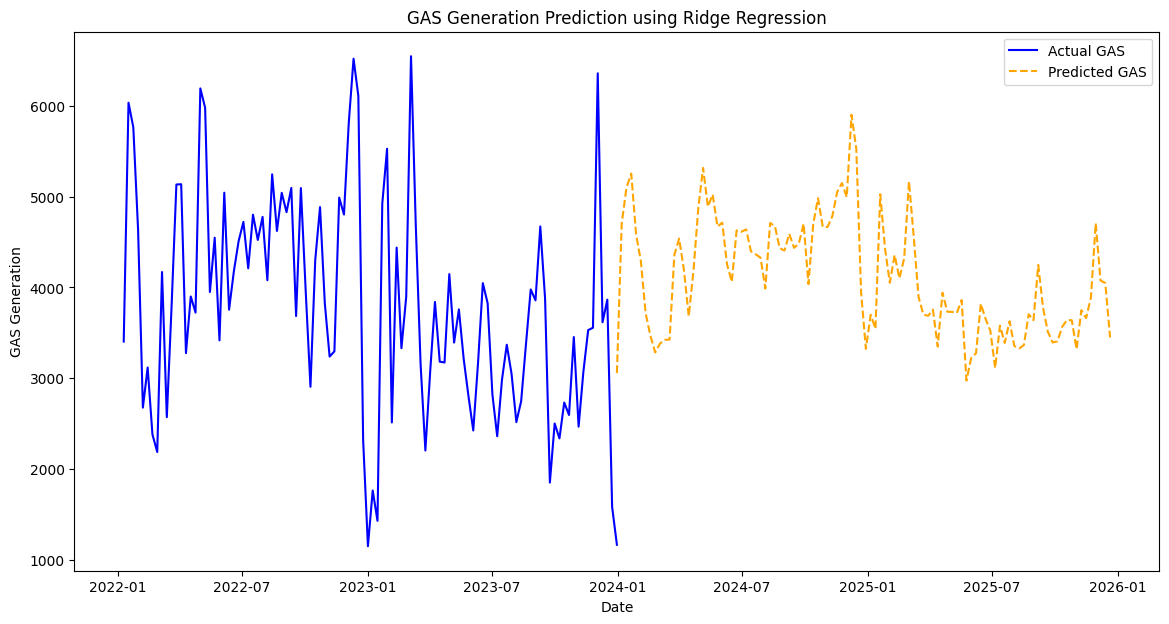

In [ ]:
# Predict
predictions = model.predict(X_test)

# Inverse scale the predictions and actual test data
predictions_real = np.zeros_like(predictions)
y_test_real = np.zeros_like(y_test)

for i, col in enumerate(energy_columns):
    predictions_real[:, i] = scalers[col].inverse_transform(predictions[:, i].reshape(-1, 1)).flatten()
    y_test_real[:, i] = scalers[col].inverse_transform(y_test[:, i].reshape(-1, 1)).flatten()

# Calculate R² and MSE
mse = mean_squared_error(y_test_real, predictions_real)
mae_ridge = mean_absolute_error(y_test_real, predictions_real)
r2 = r2_score(y_test_real, predictions_real)

# Print the results
print(f'Ridge Regression MSE: {mse}')
print(f'Ridge Regression MAE: {mae_ridge}')
print(f'Ridge Regression R²: {r2}')

# Plot predictions vs. actual
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test_real[:, 0], label='Actual GAS', color='blue')
plt.plot(pd.date_range(df.index[-1], periods=104, freq='W'), predictions_real[:, 0], label='Predicted GAS', linestyle='--', color='orange')
plt.title('GAS Generation Prediction using Ridge Regression')
plt.xlabel('Date')
plt.ylabel('GAS Generation')
plt.legend()
plt.show()

In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print Cross-Validation results
print(f"Cross-Validation MSE scores: {-cv_scores}")
print(f"Mean Cross-Validation MSE: {-cv_scores.mean()}")

# Grid Search for Ridge Regression
param_grid = {'alpha': np.logspace(-3, 3, 10)}  # Test a range of alpha values
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and evaluate
best_ridge_model = grid_search.best_estimator_

# Predict with the optimised model
predictions = best_ridge_model.predict(X_test)

# Inverse scale the predictions and actual test data
for i, col in enumerate(energy_columns):
    predictions_real[:, i] = scalers[col].inverse_transform(predictions[:, i].reshape(-1, 1)).flatten()
    y_test_real[:, i] = scalers[col].inverse_transform(y_test[:, i].reshape(-1, 1)).flatten()

# Calculate R² and MSE for the optimised model
mse = mean_squared_error(y_test_real, predictions_real)
mae_ridge = mean_absolute_error(y_test_real, predictions_real)
r2 = r2_score(y_test_real, predictions_real)

print(f'Optimised Ridge Regression MSE: {mse}')
print(f'Optimised Ridge Regression MAE: {mae_ridge}')
print(f'Optimised Ridge Regression R²: {r2}')

Cross-Validation MSE scores: [0.13612998 0.11434487 0.11280352 0.17787668 0.23971984]
Mean Cross-Validation MSE: 0.15617497733976154
Optimised Ridge Regression MSE: 223126.9020595446
Optimised Ridge Regression MAE: 218.61694288324261
Optimised Ridge Regression R²: 0.37546867227546504


##### **3.1.2 Lasso Regression**

Best alpha for Lasso: 0.004641588833612777
Cross-Validation MSE scores: [0.13176746 0.11114772 0.11030326 0.16838041 0.2329776 ]
Mean Cross-Validation MSE: 0.15091528910060434
Optimised Lasso Regression MSE: 222855.43494344215
Optimised Lasso Regression MAE: 214.71155947287787
Optimised Lasso Regression R²: 0.4512475035288267


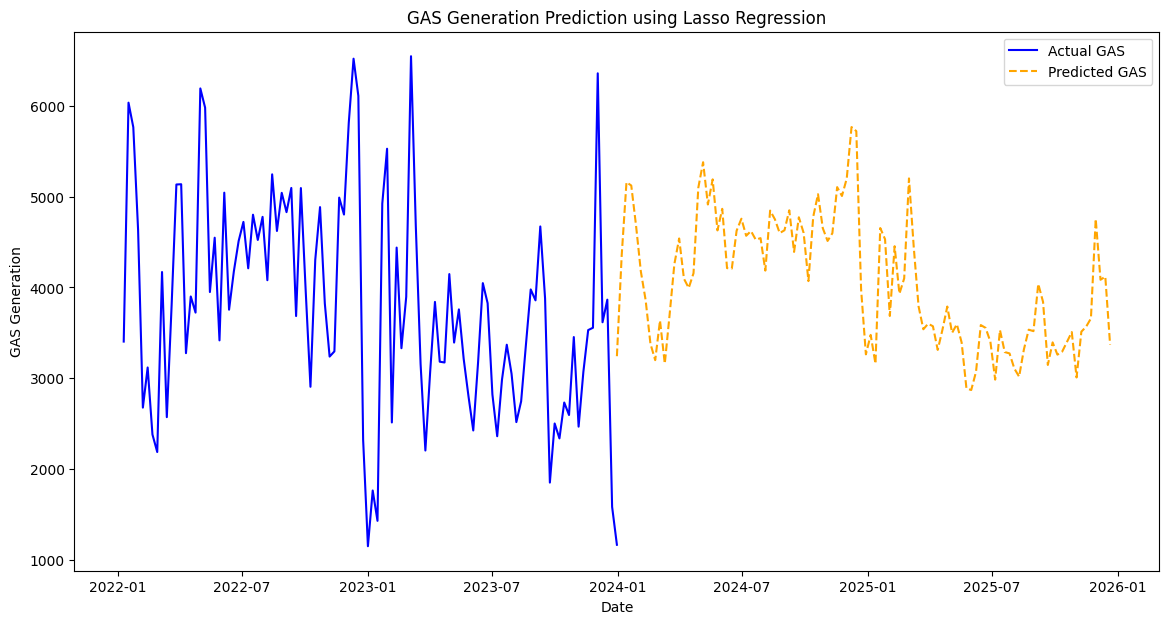

In [ ]:
# Repeat the steps in the previous prediction for Lasso regression
# Split the data
train_data, test_data = train_test_split(df, test_size=104, shuffle=False)

# Normalise the data using separate scalers for each column
scalers = {}
train_data_scaled = np.zeros_like(train_data)
test_data_scaled = np.zeros_like(test_data)

for i, col in enumerate(df.columns):
    scaler = StandardScaler()
    train_data_scaled[:, i] = scaler.fit_transform(train_data.iloc[:, i].values.reshape(-1, 1)).flatten()
    test_data_scaled[:, i] = scaler.transform(test_data.iloc[:, i].values.reshape(-1, 1)).flatten()
    scalers[col] = scaler  # Store the scaler for each column

# Prepare X and y
X_train = train_data_scaled[:, len(energy_columns):]
y_train = train_data_scaled[:, :len(energy_columns)]
X_test = test_data_scaled[:, len(energy_columns):]
y_test = test_data_scaled[:, :len(energy_columns)]

# Lasso Regression model with Grid search for alpha parameter
param_grid = {'alpha': np.logspace(-3, 3, 10)}  # Test a range of alpha values
lasso_model = Lasso(max_iter=10000)  # Increase max_iter significantly
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and evaluate
best_lasso_model = grid_search.best_estimator_

# Perform 5-fold cross-validation to evaluate the model
cv_scores = cross_val_score(best_lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Best alpha for Lasso: {grid_search.best_params_['alpha']}")
print(f"Cross-Validation MSE scores: {-cv_scores}")
print(f"Mean Cross-Validation MSE: {-cv_scores.mean()}")

# Predict with the optimised Lasso model
predictions = best_lasso_model.predict(X_test)

# Inverse scale the predictions and actual test data
predictions_real = np.zeros_like(predictions)
y_test_real = np.zeros_like(y_test)

for i, col in enumerate(energy_columns):
    predictions_real[:, i] = scalers[col].inverse_transform(predictions[:, i].reshape(-1, 1)).flatten()
    y_test_real[:, i] = scalers[col].inverse_transform(y_test[:, i].reshape(-1, 1)).flatten()

# Calculate R² and MSE for the optimised Lasso model
mse = mean_squared_error(y_test_real, predictions_real)
mae_lasso = mean_absolute_error(y_test_real, predictions_real)
r2 = r2_score(y_test_real, predictions_real)

print(f'Optimised Lasso Regression MSE: {mse}')
print(f'Optimised Lasso Regression MAE: {mae_lasso}')
print(f'Optimised Lasso Regression R²: {r2}')

# Plot predictions vs. actual for GAS generation
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test_real[:, 0], label='Actual GAS', color='blue')
plt.plot(pd.date_range(df.index[-1], periods=104, freq='W'), predictions_real[:, 0], label='Predicted GAS', linestyle='--', color='orange')
plt.title('GAS Generation Prediction using Lasso Regression')
plt.xlabel('Date')
plt.ylabel('GAS Generation')
plt.legend()
plt.show()

##### **3.1.3 Model Optimisation**

Let’s break down these results and compare the performance of the Ridge and Lasso regression models and interpret them in an easy way.

1. **Cross-Validation MSE (Mean Squared Error):**
- **Ridge Regression:**
  - MSE Scores: `[0.13612998, 0.11434487, 0.11280352, 0.17787668, 0.23971984]`
  - Mean Cross-Validation MSE: `0.15617497733976154`
  
- **Lasso Regression:**
  - MSE Scores: `[0.13176746, 0.11114772, 0.11030326, 0.16838041, 0.2329776 ]`
  - Mean Cross-Validation MSE: `0.15091528910060434`

**Interpretation & Conclusion:**
- **Ridge's Mean MSE:** `0.1562`
- **Lasso's Mean MSE:** `0.1509`
  
  - MSE measures the average squared difference between the actual and predicted values. Lower MSE indicates better model performance.
  - **Lasso** has a slightly lower Mean Cross-Validation MSE than Ridge, which indicates that it performed slightly better during cross-validation.

---

2. **Final MSE on test data:**
- **Ridge's MSE:** `223,126`
  
- **Lasso's MSE:** `222,855`

**Interpretation & Conclusion:**
  - This is the MSE calculated on the test data, after the model has been optimised using the training data.
  - Lasso has a slightly lower MSE on the test data compared to Ridge, this suggests that **Lasso** made slightly more accurate predictions.

---

3. **R² Score on test data:**
- **Ridge's R² Score:** `0.375`
  
- **Lasso's R² Score:** `0.451`

**Interpretation & Conclusion:**
- R² indicates how much of the variance in the dependent variable (the output) is explained by the model. A higher R² means the model is better at predicting the output.
- Lasso has a higher R² score than Ridge, which means it explains more of the variability in the data. The result shows that **Lasso** is better at capturing the underlying patterns in the data.

---

4. **Which model is better?**

- **Lasso Regression** performs better than Ridge Regression in all measure from this testing case.
 - Lasso has a lower Mean Cross-Validation MSE, a lower final MSE on the test data, and a higher R² score. The comparsion clearly indicates that Lasso is the better model for predicting energy generation.

---

5. **Why might Lasso be better?**
- **Lasso Regression** not only fits the data well but also performs feature selection by driving the coefficients of less important features to zero. This makes Lasso potentially better at simplifying the model, which can help improve performance on unseen data.
  
**Result:**
- **Lasso Regression** will be applied for my final predictions, as it provides better accuracy and explains more of the variance in the data.

**Next Step:** Store the prediction data of Lasso regression model

In [ ]:
# Save the results for 2024-2025 to a CSV file
results_df = pd.DataFrame(predictions_real[:104], columns=energy_columns)  # Select first 104 weeks
results_df['DATETIME'] = pd.date_range(start='2024-01-01', periods=104, freq='W')
results_df = results_df[['DATETIME'] + energy_columns]

save_path = '/content/drive/MyDrive/ColabNotebooks/AcademicProjectsDU/Research_Electricity-GB/updated_df_predictions_2024_2025.csv'
results_df.to_csv(save_path, index=False)

print(f"Predictions saved to {save_path}")

Predictions saved to /content/drive/MyDrive/ColabNotebooks/AcademicProjectsDU/Research_Electricity-GB/updated_df_predictions_2024_2025.csv


#### **3.2 Prediction Data Processing**

In [ ]:
# Load data
csv_path_predictions = '/content/drive/MyDrive/ColabNotebooks/AcademicProjectsDU/Research_Electricity-GB/updated_df_predictions_2024_2025.csv'
df_predictions = pd.read_csv(csv_path_predictions)

# Remove timezone information
df_week.index = pd.to_datetime(df_week.index).tz_localize(None)
df_predictions['DATETIME'] = pd.to_datetime(df_predictions['DATETIME'])

# Convert the index of df_week to a column
df_week = df_week.reset_index()

# Concatenate the two dataframes
df_0925 = pd.concat([df_week, df_predictions], ignore_index=True)

# Sort the dataframe by datetime to ensure chronological order
df_0925.sort_values(by='DATETIME', inplace=True)

# Calculate new columns (4 categories) based on the specified rules
df_0925['LOW_CARBON'] = df_0925['BIOMASS']
df_0925['ZERO_CARBON'] = df_0925[['WIND', 'SOLAR', 'HYDRO', 'NUCLEAR']].sum(axis=1)
df_0925['RENEWABLE'] = df_0925[['WIND', 'SOLAR', 'HYDRO']].sum(axis=1)
df_0925['FOSSIL'] = df_0925[['COAL', 'GAS']].sum(axis=1)

# Resample the data to yearly frequency and calculate the sum for each year
df_annual_0925 = df_0925.resample('Y', on='DATETIME').sum()

# Round all values to 2 decimal places
df_annual_0925 = df_annual_0925.round(2)

# Reset the index to have 'DATETIME' as a column again - to enhance consistency
df_annual_0925.reset_index(inplace=True)

# Display the information of the transformed dataframe
print(df_annual_0925.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATETIME          17 non-null     datetime64[ns]
 1   GAS               17 non-null     float64       
 2   COAL              17 non-null     float64       
 3   NUCLEAR           17 non-null     float64       
 4   WIND              17 non-null     float64       
 5   HYDRO             17 non-null     float64       
 6   IMPORTS           17 non-null     float64       
 7   BIOMASS           17 non-null     float64       
 8   OTHER             17 non-null     float64       
 9   SOLAR             17 non-null     float64       
 10  STORAGE           17 non-null     float64       
 11  CARBON_INTENSITY  17 non-null     float64       
 12  LOW_CARBON        17 non-null     float64       
 13  ZERO_CARBON       17 non-null     float64       
 14  RENEWABLE         17 non-nul

#### **3.3 Prediction Visualisation**

**Line Chart - Generation catrgories vs. Carbon Intensity**

In [ ]:
# List of columns, only Carbon intensity has different units
type_columns = ['CARBON_INTENSITY', 'LOW_CARBON', 'ZERO_CARBON', 'RENEWABLE', 'FOSSIL']

# Create the figure
fig = go.Figure()

# Plot data for columns with GWh unit on the left y-axis
for column in type_columns[1:]:
    color = 'gold' if column == 'FOSSIL' else 'violet' if column == 'ZERO_CARBON' else None
    fig.add_trace(go.Scatter(
        x=df_annual_0925["DATETIME"],
        y=df_annual_0925[column],
        mode='lines+markers',
        name=column,
        yaxis='y1',
        line=dict(color=color),
        hovertemplate='%{x|%Y-%m-%d}<br>%{customdata}',
        customdata=[format_hover(y) for y in df_annual_0925[column]]
    ))

# Plot Carbon intensity data on the right y-axis (red color)
fig.add_trace(go.Scatter(
    x=df_annual_0925["DATETIME"],
    y=df_annual_0925['CARBON_INTENSITY'],
    mode='lines+markers',
    name='CARBON INTENSITY',
    yaxis='y2',
    line=dict(color='red', width=5, dash='dash'),
    hovertemplate='%{x|%Y-%m-%d}<br>%{customdata}',
    customdata=[format_hover(y) for y in df_annual_0925['CARBON_INTENSITY']]
))

# Set layout
fig.update_layout(
    title='Generation Trends of Energy Types and Carbon Intensity',
    xaxis=dict(
        title='Year',
        showline=True,
        linewidth=2,
        linecolor='black',
        gridcolor='lightgray',
        gridwidth=0.5,
        titlefont=dict(size=16, color='black'),
        tickfont=dict(size=14, color='black'),
    ),
    yaxis=dict(
        title='Generation (GWh)',
        titlefont=dict(size=16, color='black'),
        tickfont=dict(size=14, color='black'),
        showline=True,
        linewidth=2,
        linecolor='black',
        gridcolor='lightgray',
        gridwidth=0.5,
        mirror=True
    ),
    yaxis2=dict(
        title='Carbon Intensity (kgCO2/kWh)',
        titlefont=dict(size=16, color='red'),
        tickfont=dict(size=14, color='red'),
        overlaying='y',
        side='right',
        showline=True,
        linewidth=2,
        linecolor='black'
    ),
    legend=dict(
        x=0.82,
        y=0.99,
        xanchor='left',
        yanchor='top',
        bordercolor="Black",
        borderwidth=1,
        orientation="v"
    ),
    plot_bgcolor='rgba(255, 255, 255, 1)',
    margin=dict(t=50, l=50, r=100, b=50),
    legend_itemclick="toggleothers"
)

# Enhance contrast and readability
fig.update_traces(marker=dict(size=6, line=dict(width=2)),
                  line=dict(width=2))

# Display
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
# Filter data for the years: 2009 and 2025
data_2009 = df_annual_0925[df_annual_0925["DATETIME"].dt.year == 2009]
data_2025 = df_annual_0925[df_annual_0925["DATETIME"].dt.year == 2025]

# Extract values for the pie charts
values_2009 = [
    data_2009['RENEWABLE'].values[0],
    data_2009['NUCLEAR'].values[0],
    data_2009['FOSSIL'].values[0]
]

values_2025 = [
    data_2025['RENEWABLE'].values[0],
    data_2025['NUCLEAR'].values[0],
    data_2025['FOSSIL'].values[0]
]

# Define colors
colors = ['#90EE90', '#5DADE2', '#FFA07A']

# Create subplots with two pie charts
fig = go.Figure()

# Pie chart for 2009
fig.add_trace(go.Pie(
    labels=['RENEWABLE', 'NUCLEAR', 'FOSSIL'],
    values=values_2009,
    name="2009",
    hole=0.27,
    marker=dict(colors=colors, line=dict(color='white', width=2)),
    domain=dict(x=[0, 0.48]),
    title=dict(text='2009', font=dict(size=16)),
))

# Pie chart for 2025
fig.add_trace(go.Pie(
    labels=['RENEWABLE', 'NUCLEAR', 'FOSSIL'],
    values=values_2025,
    name="2025",
    hole=0.27,
    marker=dict(colors=colors, line=dict(color='white', width=2)),
    domain=dict(x=[0.52, 1.0]),
    title=dict(text='2025', font=dict(size=16)),
))

# Update layout
fig.update_layout(
    title_text="Energy Type Distribution Comparison: 2009 vs 2025 (predicted)",
    title_x=0.5,
    title_y=0.95,
    showlegend=False,
    plot_bgcolor='lightgray',
    paper_bgcolor='lightgray',
    margin=dict(t=70, l=50, r=50, b=50),
    height=600,  # Set height for the figure
    width=1200,  # Set width for the figure
)

# Update pie sizes and position
fig.update_traces(marker=dict(line=dict(width=1)),
                  textinfo='percent+label',
                  textfont_size=14)

# Show the plot
fig.show()